In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('subset-covid-data.csv')
data

,country,continent,date,day,month,year,cases,deaths,country_code,population
0,Afghanistan,Asia,2020-04-12,12,4,2020,34,3,AFG,37172386.0
1,Albania,Europe,2020-04-12,12,4,2020,17,0,ALB,2866376.0
2,Algeria,Africa,2020-04-12,12,4,2020,64,19,DZA,42228429.0
3,Andorra,Europe,2020-04-12,12,4,2020,21,2,AND,77006.0
4,Angola,Africa,2020-04-12,12,4,2020,0,0,AGO,30809762.0
...,...,...,...,...,...,...,...,...,...,...
201,Venezuela,America,2020-04-12,12,4,2020,0,0,VEN,28870195.0
202,Vietnam,Asia,2020-04-12,12,4,2020,4,0,VNM,95540395.0
203,Yemen,Asia,2020-04-12,12,4,2020,0,0,YEM,28498687.0
204,Zambia,Africa,2020-04-12,12,4,2020,0,0,ZMB,17351822.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       206 non-null    object 
 1   continent     206 non-null    object 
 2   date          206 non-null    object 
 3   day           206 non-null    int64  
 4   month         206 non-null    int64  
 5   year          206 non-null    int64  
 6   cases         206 non-null    int64  
 7   deaths        206 non-null    int64  
 8   country_code  202 non-null    object 
 9   population    202 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 16.2+ KB


In [2]:
# Các quốc gia có số lượng mắc mới trong ngày 12-4-2020
# data['date'].unique()
data['date'].value_counts()


2020-04-12    204
2020-01-18      1
2020-04-11      1
Name: date, dtype: int64

Trung bình số ca mắc mới: 376.8186274509804
Trung vị số ca mắc mới: 11.5
Mode số ca mắc mới: 0    0
dtype: int64


Text(0, 0.5, 'Số lượng quốc gia')

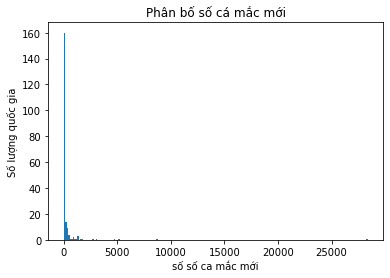

In [8]:
# các quốc gia có sô lượng ca mắc mới trong ngày 12-4-2020
# số ca tử vong trong ngày 12-4-2020
cleaned_data = data[data['date']=='2020-04-12']
print('Trung bình số ca mắc mới:', cleaned_data['cases'].mean())
print('Trung vị số ca mắc mới:', cleaned_data['cases'].median())
print('Mode số ca mắc mới:', cleaned_data['cases'].mode())

import matplotlib.pyplot as plt
plt.hist(cleaned_data.cases, bins=200)
plt.title('Phân bố số cá mắc mới')
plt.xlabel('số số ca mắc mới')
plt.ylabel('Số lượng quốc gia')
# cleaned_data.groupby(by='country')['cases'].sum()

In [4]:
# Tổng số ca mắc mới, số ca tử vong ở từng châu lục
print('Tổng số ca mắc mới của từng châu lục')
data.groupby(by='continent')[['cases','deaths']].sum()

Tổng số ca mắc mới của từng châu lục


,cases,deaths
continent,,
Africa,714,52
America,33519,2111
Asia,12979,383
Europe,34141,3571
Oceania,68,4
Other,0,0


In [5]:
# Top 5 quốc gia có số ca nhiễm mới cao nhất
data.sort_values('cases',ascending=False).head(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
190,Turkey,Asia,2020-04-12,12,4,2020,5138,95,TUR,82319724.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0


In [6]:
# Top 5 quốc gia có số ca tử vong cao nhất
data.sort_values('deaths',ascending=False).head(5)

,country,continent,date,day,month,year,cases,deaths,country_code,population
198,United_States_of_America,America,2020-04-12,12,4,2020,28391,1831,USA,327167434.0
195,United_Kingdom,Europe,2020-04-12,12,4,2020,8719,839,GBR,66488991.0
69,France,Europe,2020-04-12,12,4,2020,3114,635,FRA,66987244.0
98,Italy,Europe,2020-04-12,12,4,2020,4694,619,ITA,60431283.0
177,Spain,Europe,2020-04-11,11,4,2020,4550,605,ESP,46723749.0
